# A numerical optimization example

In this notebook we will explore how to numerically optimize a function. 

Let's start importing some modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Now define the following function:
$$
f(x,y)=(x-5)^2+(y-2)^2+0.1(x^4+xy^3)
$$

In [4]:
def f(x,y):
    return (x-5)**2+(y-2)**2+0.1*(x**4+x*y**3)

## function plotting

Use a contour plot to represent this function as in the following plot.
We can define the x and y ranges like:

In [5]:
x = np.linspace(-1, 6)
y = np.linspace(-2, 6)

But remark that to plot the function we cannot do `f(x,y)` because that would return an array of values ${f(x_0,y_0), f(x_1,y_1), f(x_2,y_2) \ldots}$.

What we want is, given an $x_i$, to calculate $f(x,y)$ for all $y_j$ values. Thus we need to create a mesh of 2D points $(x_i, y_j)$. We could do that manually, but as often happens for frequent operations, numpy can do this for us. Check how to use [`meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) and use it to reproduce the following plot:

In [6]:
f(x,y)

array([ 52.9       ,  49.61175288,  46.50822301,  43.56983108,
        40.77948947,  38.12260222,  35.58706503,  33.16326531,
        30.84408209,  28.62488613,  26.50353983,  24.48039726,
        22.55830418,  20.74259802,  19.04110787,  17.46415451,
        16.02455039,  14.73759962,  13.62109799,  12.69533297,
        11.9830837 ,  11.50962099,  11.30270733,  11.39259687,
        11.81203544,  12.59626055,  13.78300137,  15.41247877,
        17.52740525,  20.17298502,  23.39691394,  27.24937957,
        31.78306112,  37.05312947,  43.11724719,  50.03556851,
        57.87073935,  66.68789729,  76.55467158,  87.54118316,
        99.72004461, 113.16636023, 127.95772595, 144.1742294 ,
       161.89844987, 181.21545833, 202.21281742, 224.98058146,
       249.61129644, 276.2       ])

In [10]:
XX, YY = np.meshgrid(x,y)
f(XX,YY).shape

(50, 50)

In [12]:
f(x,y).shape

(50,)

In [13]:
type(np.meshgrid(x,y))

list

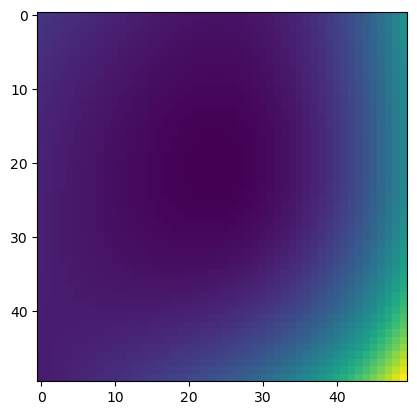

In [16]:
plt.imshow(f(XX,YY))

## function optimization

Now that we know that the function has a minima, we will use the [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) module to minimize this function. 

The previous link leads to the API reference, but Scipy also has a more pedagogical documentation in the *User Manual*. You can explore its [optimization section](https://docs.scipy.org/doc/scipy/tutorial/optimize.html).

In [208]:
from scipy.optimize import minimize

For any numerical optimization, we need a starting point. Here we will start with this $x_0$.

In [209]:
x0 = np.array([5.5, 3])

Try to minimize this function and assign the output to result:

In [ ]:
result =

Ooops! Something went wrong. Can you see what it is? Can you suggest a solution?

_Explanation: what went wrong is that minimize assumes the function `f` takes a single argument. If it takes more than one coordinate, such as ours, they should be given as an array (as `x0`) not as 2 arguments, as our function `f(x,y)` has. One simple solution is to use [argument unpacking](https://docs.python.org/3/tutorial/controlflow.html#arbitrary-argument-lists)_

In [212]:
def f2(X):
    

Now we can call `minimize`:

In [ ]:
result =

It seems that the minimization did not converge. That makes sense, the $y^3$ makes this function unbound and the algorithm overshoot the minimum we had seen. We have two possibilities. One is to start from a better initial point (this is left as an exercise). Another is to minimize the function in a certain domain. This is done using the `bounds` option. Try it.

_Remark that minimization within bounds uses a different algorithm, and that is why the output is different._

In [ ]:
result = 

**success!** You can access the function value and the minimized coordinates as attributes of `result`

In [218]:
result.fun, result.x

(11.071820273063501, array([2.33361648, 1.35618696]))

## Some extras

### Optmization method

Remark that you can use different optimization methods. Some of these methods require the gradient or the Hessian of the function. If you can calculate them analytically it is worth providing them to minimize with `jac` and `hess`. You can also use [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) to find the gradient and the hessian, as can be done, for example, with [Jax](https://jax.readthedocs.io/en/latest/notebooks/autodiff_cookbook.html). This is an advanced topic that we will not cover here.

`minimize` is clever enough to use different methods depending on whether we provide the gradient or the hessian. However you can choose a particular method with the `method` keyword. Different methods have different options that can be provided with the `options` keyword, and they are [detailed in the documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.show_options.html).

### extra arguments in our function

Imagine that our function has some arguments that should not be optimized. They can be considered as function parameters, for example we may want to flexibly define our function as:
$$
f(x,y, \alpha)=(x-5)^2+(y-2)^2+\alpha(x^4+xy^3)
$$

In that case (and already knowing that the parameters to be optimized should be an array) we could define `f3` as:

In [219]:
def f3(x, alpha):
    x0, x1 = x
    return (x0-5)**2+ (x1-2)**2 + alpha*(x0**4+x0*x1**3)

Again `minimize(f3,x0)` will not work. We need to give the extra argument. Look into the documentation how to do it.

In [224]:
minimize(...)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 11.071820273063501
        x: [ 2.334e+00  1.356e+00]
      nit: 9
      jac: [ 1.776e-07  1.776e-07]
     nfev: 30
     njev: 10
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

### Plotting the minimization history

In some cases we might be interested in knowing the intermediate points that have been generated during the optimization alorithm. We may want to plot them, but they are not in the `result` object. One way to access them is with the `callback` option. This option will call a function `callback(xk)` where `xk` is the current parameter vector (`callback` can also use a more complex signature).

In this case, we can make callback append the `xk` point to a list that is available in the namespace. Remark that we can not pass it as an argument.

Try to do it.

In [227]:
x_progress = [x0,]
def callback(x):
    x_progress.append(x)


In [228]:
result=minimize(f2,x0, bounds=((-2,6),(-1,6)), callback=callback)

Let's explore what `x_progress` contains:

In [230]:
x_progress

[array([5.5, 3. ]),
 array([-2., -1.]),
 array([-0.4866957 ,  0.00896405]),
 array([2.14776533, 1.59340178]),
 array([2.4873896 , 1.37074359]),
 array([2.31452009, 1.32422342]),
 array([2.33173123, 1.36108773]),
 array([2.33389363, 1.35585894]),
 array([2.33361317, 1.35618434]),
 array([2.33361648, 1.35618696])]

now we can convert it into an array, and plot it:

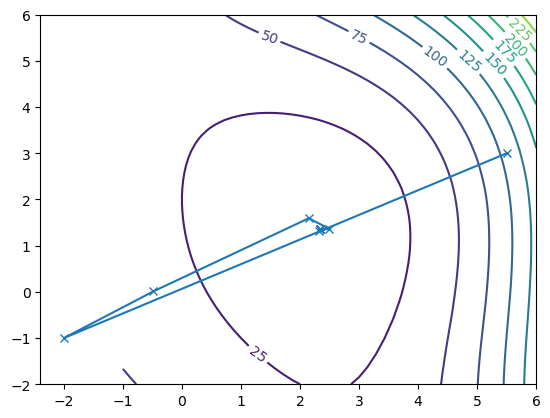

This way you can compare how different algorithms converge. But remember that you need to use a different (global) list for each of them:

In [232]:
def callback2():...

result = minimize(f2,x0, bounds=((-2,6),(-1,6)), method="Nelder-Mead",
                 callback=callback2)

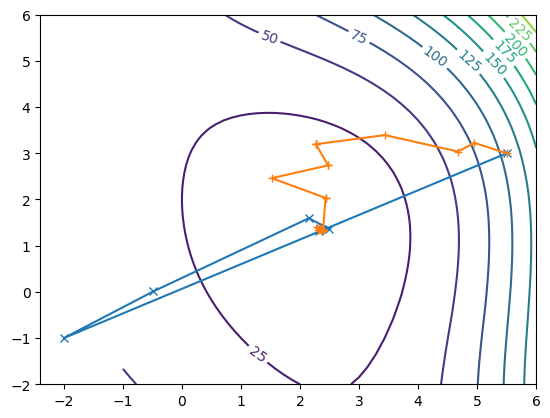